In [2]:
# IMPORT DES LIBRAIRIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import re

## IMPORT & READ FILE

In [3]:
df = pd.read_excel("./4 - Salaries_Data.xlsx")

## CLONING DATA (IN ORDER NOT TO RELOAD .CSV EACH TIME)

In [4]:
data = df

 ## CHECKING : STARTING NUMBER OF ROWS AND GENERAL DISPLAY

In [5]:
data

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,7/2/2019 16:43:16,Intel,Grade 7,Hardware Engineer,200000.0,"Santa Clara, CA",14.0,3.0,Physical Design,163000.0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,Asian,NaN
1,10/13/2019 11:43:20,Latch,Manager,Software Engineering Manager,170000.0,"New York, NY",6.0,2.0,Full Stack,170000.0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,Asian,NaN
2,12/30/2019 11:16:12,Intuit,Software Engineer 1,Software Engineer,134000.0,"Mountain View, CA",1.0,1.0,Web Development (Front-End),110000.0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,Asian,NaN
3,1/27/2020 22:59:06,Google,L6,Software Engineer,400000.0,"Sunnyvale, CA",5.0,5.0,Distributed Systems (Back-End),210000.0,...,1,0,0.0,1.0,0.0,0.0,0.0,0.0,Asian,PhD
4,2/14/2020 21:22:30,Spotify,Senior Engineer,Software Engineer,210000.0,"New York, NY",8.0,2.5,Full Stack,170000.0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,Asian,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,8/17/2021 8:22:17,Fidelity Investments,L3,Software Engineer,98000.0,"Durham, NC",0.0,0.0,Full Stack,85000.0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,White,NaN
62638,9/3/2020 9:24:25,Facebook,M2,Software Engineering Manager,1733000.0,"Seattle, WA",23.0,6.0,DevInfra,288000.0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,White,Bachelor's Degree
62639,11/9/2020 20:27:59,Snap,L5,Software Engineering Manager,1400000.0,"Los Angeles, CA",5.0,4.0,Security,235000.0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,White,Bachelor's Degree
62640,1/17/2021 4:38:07,Broadcom,Director,Marketing,1470000.0,"San Jose, CA",21.0,9.0,Product,220000.0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,White,Master's Degree


In [6]:
len(data)

62642

## CHECKING : DATA TYPES

In [7]:
# WHAT ARE THE DIFFERENT TYPES OF DATA IN OUR DATAFRAME :
display(data.dtypes.to_frame())

,0
timestamp,object
company,object
level,object
title,object
totalyearlycompensation,float64
location,object
yearsofexperience,float64
yearsatcompany,float64
tag,object
basesalary,float64


## COLUMNS OPERATIONS


### CREATING CLEAN NEW COLUMNS FROM PREVIOUS ONES

In [8]:
# CREATING NEW COMPANY & TITLE COLUMN : to add new company column and delete the existing one

data['company_name'] = data['company'].str.upper()

# REPLACING ALL 

data['title_new'] = data["title"].str.replace(r'Soft Engineer', 'Software Engineer', regex=True)

# CREATING NEW COUNTRY & FILL MISSING VALUES WITH USA

data["country"] = data["location"].str.split(',').str[2]
data[['country']] = data[['country']].fillna(' USA')


data.head(2)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,company_name,title_new,country
0,7/2/2019 16:43:16,Intel,Grade 7,Hardware Engineer,200000.0,"Santa Clara, CA",14.0,3.0,Physical Design,163000.0,...,1.0,0.0,0.0,0.0,0.0,Asian,NaN,INTEL,Hardware Engineer,USA
1,10/13/2019 11:43:20,Latch,Manager,Software Engineering Manager,170000.0,"New York, NY",6.0,2.0,Full Stack,170000.0,...,1.0,0.0,0.0,0.0,0.0,Asian,NaN,LATCH,Software Engineering Manager,USA


### DROPPING COLUMNS WE KNOW WE'RE NOT GONNA USE

In [9]:
# DROPPING IRRELEVANT COLUMNS OR COLUMNS WE ARE NOT USING :

dropped_data = data.drop(["title", "timestamp", "company", "Race_Asian", "Race_White", "Race_Two_Or_More","Race_Black","Race_Hispanic",
                          "Masters_Degree", "Bachelors_Degree", "Doctorate_Degree", "Highschool", "Some_College", "level", "otherdetails", "dmaid"], axis=1)

dropped_data.head(2)

,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,cityid,rowNumber,Race,Education,company_name,title_new,country
0,200000.0,"Santa Clara, CA",14.0,3.0,Physical Design,163000.0,10000.0,27000.0,Female,7434,11381,Asian,NaN,INTEL,Hardware Engineer,USA
1,170000.0,"New York, NY",6.0,2.0,Full Stack,170000.0,0.0,0.0,Male,10182,16214,Asian,NaN,LATCH,Software Engineering Manager,USA


### RENAMING COLUMNS

In [10]:
# RENAMING COLUMN NAMES FOR MORE CLARITY : 

dropped_data.rename(columns = {'totalyearlycompensation': 'total_yearly_compensation', 'yearsofexperience': 'years_of_experience', 'yearsatcompany': 'years_at_company',
                       'basesalary': 'base_salary', 'stockgrantvalue': 'stock_grant_value', 'cityid': 'city_id','rowNumber': 'row_number', 'Race' : 'race', 'Education' : 'education', 'title_new' : 'title'}, inplace=True)


### REORDERING COLUMNS

In [11]:
# REORDERING OUR DATA FRAME COLUMNS TO MAKE IT MORE READABLE/EXPLOITABLE :

new_columns_order = ["row_number", "company_name", "country", "location", "city_id", "years_of_experience", "years_at_company", "title", "tag", "total_yearly_compensation", "base_salary", "stock_grant_value", "bonus",
                     "gender", "race", "education"]
reordered_data = dropped_data[new_columns_order]

reordered_data.head(2)


,row_number,company_name,country,location,city_id,years_of_experience,years_at_company,title,tag,total_yearly_compensation,base_salary,stock_grant_value,bonus,gender,race,education
0,11381,INTEL,USA,"Santa Clara, CA",7434,14.0,3.0,Hardware Engineer,Physical Design,200000.0,163000.0,10000.0,27000.0,Female,Asian,NaN
1,16214,LATCH,USA,"New York, NY",10182,6.0,2.0,Software Engineering Manager,Full Stack,170000.0,170000.0,0.0,0.0,Male,Asian,NaN


## LOCATING MISSING DATA

In [12]:
# OÙ SONT LOCALISEES LES DONNEES MANQUANTES DANS NOTRE DATAFRAME ?

reordered_data.isnull().sum()

row_number                       0
company_name                     5
country                          0
location                         3
city_id                          0
years_of_experience              0
years_at_company                 0
title                            3
tag                            854
total_yearly_compensation        3
base_salary                      1
stock_grant_value                3
bonus                            1
gender                       19540
race                         40215
education                    32272
dtype: int64

## DROPPING MISSING DATA

### COLUMNS

In [13]:
# MISSING VALUES ARE LESS THAN 2% OF THE REMAINING RELEVANT DATA
# SO WE ARE DROPPING THE CORRESPONDING ROWS

cleaned_data1 = reordered_data.dropna(subset=['company_name'])
cleaned_data2 = cleaned_data1.dropna(subset=['location'])
cleaned_data3 = cleaned_data2.dropna(subset=['title'])
cleaned_data4 = cleaned_data3.dropna(subset=['tag'])
cleaned_data5 = cleaned_data4.dropna(subset=['total_yearly_compensation'])
cleaned_data6 = cleaned_data5.dropna(subset=['base_salary'])
cleaned_data7 = cleaned_data6.dropna(subset=['stock_grant_value'])
cleaned_data8 = cleaned_data7.dropna(subset=['bonus'])

data = cleaned_data8

data.isnull().sum()

row_number                       0
company_name                     0
country                          0
location                         0
city_id                          0
years_of_experience              0
years_at_company                 0
title                            0
tag                              0
total_yearly_compensation        0
base_salary                      0
stock_grant_value                0
bonus                            0
gender                       19031
race                         39374
education                    31442
dtype: int64

### ROWS

In [14]:
# DELETING ROWS THAT ARE UNEXPLOITABLE
print(len(data))

# COUNTRIES WHICH ARE NOT
indices_to_drop1 = data.loc[data['location'] == 'Tel Aviv, Israel'].index
data = data.drop(indices_to_drop1)
print(len(data))

# YEARS OF EXPERIENCE = 0
indices_to_drop2 = data.loc[data['years_of_experience'] == 0].index
data = data.drop(indices_to_drop2)
print(len(data))

# MISGENDERING
indices_to_drop3 = data.loc[data['gender'] == "Title: Senior Software Engineer"].index
data = data.drop(indices_to_drop3)
print(len(data))

data.head(2)

61780
61778
57240
57239


,row_number,company_name,country,location,city_id,years_of_experience,years_at_company,title,tag,total_yearly_compensation,base_salary,stock_grant_value,bonus,gender,race,education
0,11381,INTEL,USA,"Santa Clara, CA",7434,14.0,3.0,Hardware Engineer,Physical Design,200000.0,163000.0,10000.0,27000.0,Female,Asian,NaN
1,16214,LATCH,USA,"New York, NY",10182,6.0,2.0,Software Engineering Manager,Full Stack,170000.0,170000.0,0.0,0.0,Male,Asian,NaN


### REPLACING TYPOS

In [15]:
# FROM "SOFT ENGINEER" TO "SOFTWARE ENGINEER"

# print(data['title'].value_counts())
# data['title'] = data['title'].replace('Soft Engineer', 'Software Engineer')

print(data['title'].value_counts())

data_raw = data

data.head()

Software Engineer               36717
Product Manager                  4421
Software Engineering Manager     3518
Data Scientist                   2383
Hardware Engineer                2090
Product Designer                 1482
Technical Program Manager        1371
Solution Architect               1127
Management Consultant             906
Business Analyst                  818
Marketing                         700
Sales                             457
Recruiter                         449
Mechanical Engineer               445
Human Resources                   355
Name: title, dtype: int64


,row_number,company_name,country,location,city_id,years_of_experience,years_at_company,title,tag,total_yearly_compensation,base_salary,stock_grant_value,bonus,gender,race,education
0,11381,INTEL,USA,"Santa Clara, CA",7434,14.0,3.0,Hardware Engineer,Physical Design,200000.0,163000.0,10000.0,27000.0,Female,Asian,NaN
1,16214,LATCH,USA,"New York, NY",10182,6.0,2.0,Software Engineering Manager,Full Stack,170000.0,170000.0,0.0,0.0,Male,Asian,NaN
2,19450,INTUIT,USA,"Mountain View, CA",7322,1.0,1.0,Software Engineer,Web Development (Front-End),134000.0,110000.0,13000.0,11000.0,Male,Asian,NaN
3,21208,GOOGLE,USA,"Sunnyvale, CA",7472,5.0,5.0,Software Engineer,Distributed Systems (Back-End),400000.0,210000.0,145000.0,45000.0,Male,Asian,PhD
4,22644,SPOTIFY,USA,"New York, NY",10182,8.0,2.5,Software Engineer,Full Stack,210000.0,170000.0,40000.0,0.0,Male,Asian,NaN


## DEALING WITH OUTLIERS

### YEARS_OF_EXPERIENCE | TOTAL_YEARLY_COMPENSATION | BASE_SALARY | BONUS

### METHOD 1 : TINKERING AROUND

In [16]:
# YEARS OF EXPERIENCE & YEARS AT COMPANY
q = data["years_of_experience"].quantile(0.99997)
p = data["years_at_company"].quantile(0.99997)
data = data[data["years_of_experience"] < q]
data = data[data["years_at_company"] < p]
data

# YEARLY COMPENSATION
a = data["total_yearly_compensation"].quantile(0.99994)
data = data[data["total_yearly_compensation"] < a]

# BASE SALARY
b = data["base_salary"].quantile(0.99997)
data = data[data["base_salary"] < b]

# YEARLY BONUS
c = data["bonus"].quantile(0.99997)
data = data[data["bonus"] < c]

### METHOD 2 : TRYING TO IDENTIFY THEM BY VISUALIZATION

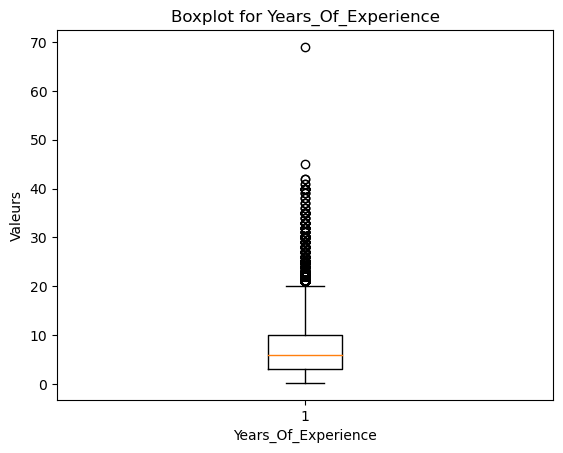

In [17]:
plt.boxplot(data_raw['years_of_experience'])

plt.title('Boxplot for Years_Of_Experience')
plt.xlabel('Years_Of_Experience')
plt.ylabel('Valeurs')
plt.ticklabel_format(style='plain', axis='y')

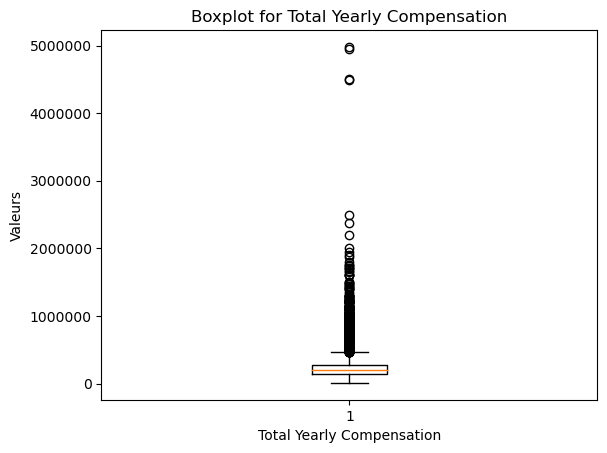

In [18]:
plt.boxplot(data_raw['total_yearly_compensation'])

plt.title('Boxplot for Total Yearly Compensation')
plt.xlabel('Total Yearly Compensation')
plt.ylabel('Valeurs')
plt.ticklabel_format(style='plain', axis='y')


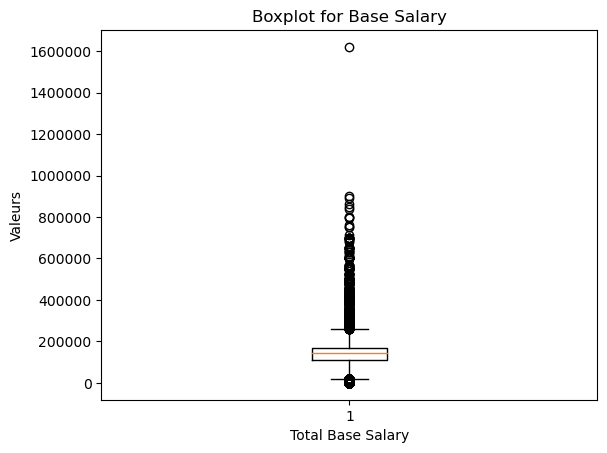

In [19]:
plt.boxplot(data_raw['base_salary'])

plt.title('Boxplot for Base Salary')
plt.xlabel('Total Base Salary')
plt.ylabel('Valeurs')
plt.ticklabel_format(style='plain', axis='y')

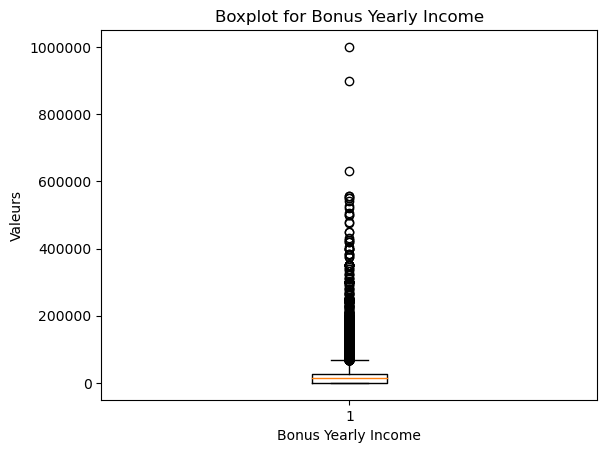

In [20]:
plt.boxplot(data_raw['bonus'])

plt.title('Boxplot for Bonus Yearly Income')
plt.xlabel('Bonus Yearly Income')
plt.ylabel('Valeurs')
plt.ticklabel_format(style='plain', axis='y')

### METHOD 3 : LEARNING ABOUT .nlargest()

In [21]:
### YEARS_OF_EXPERIENCE | TOTAL_YEARLY_COMPENSATION | BASE_SALARY | BONUS

display(data_raw["years_of_experience"].nlargest(5))
display(data_raw["years_at_company"].nlargest(5))

display(data_raw["total_yearly_compensation"].nlargest(5))

display(data_raw["base_salary"].nlargest(5))

display(data_raw["bonus"].nlargest(5))

47318    69.0
57972    45.0
23104    42.0
23204    42.0
24551    41.0
Name: years_of_experience, dtype: float64

47318    69.0
60462    40.0
21118    34.0
48524    34.0
48243    33.0
Name: years_at_company, dtype: float64

11771    4980000.0
53140    4950000.0
11769    4500000.0
53155    4490000.0
53142    2500000.0
Name: total_yearly_compensation, dtype: float64

53024    1620000.0
6011      900000.0
61446     893000.0
61766     861000.0
53140     850000.0
Name: base_salary, dtype: float64

14229    1000000.0
10819     900000.0
21425     630000.0
12819     555000.0
54031     555000.0
Name: bonus, dtype: float64

In [22]:
### YEARS_OF_EXPERIENCE | TOTAL_YEARLY_COMPENSATION | BASE_SALARY | BONUS

display(data["years_of_experience"].nlargest(5))
display(data["years_at_company"].nlargest(5))

display(data["total_yearly_compensation"].nlargest(5))

display(data["base_salary"].nlargest(5))

display(data["bonus"].nlargest(5))

23104    42.0
23204    42.0
24551    41.0
24608    41.0
12370    40.0
Name: years_of_experience, dtype: float64

21118    34.0
48524    34.0
48243    33.0
53077    33.0
36220    32.0
Name: years_at_company, dtype: float64

53142    2500000.0
12461    2372000.0
53152    2200000.0
53145    2000000.0
53147    1950000.0
Name: total_yearly_compensation, dtype: float64

61446    893000.0
61766    861000.0
51023    840000.0
3713     800000.0
43190    800000.0
Name: base_salary, dtype: float64

21425    630000.0
12819    555000.0
54031    555000.0
19850    550000.0
33716    550000.0
Name: bonus, dtype: float64

In [23]:
missing_values_sum = data['total_yearly_compensation'].isnull().sum()
missing_values = data['total_yearly_compensation'].isnull()

print("Number of missing value(s) is : ", missing_values_sum)
# display(missing_values)

Number of missing value(s) is :  0


## FILLING UP THE MISSING TOTAL_YEARLY_COMPENSATION WITH AN AVERAGE


In [24]:
 # CREATING A DICTIONARY TO ACCESS THEM
average_yearly_compensation = {
    "Business_Analyst": 103505.08,
    "Data_Scientist": 138054.69,
    "Hardware_Engineer": 139628.18,
    "Human_Resources": 128590.66,
    "Management Consultant": 136195.7,
    "Marketing": 140957.75,
    "Mechanical_Engineer": 118455.1,
    "Product_Designer": 137188.12,
    "Product_Manager": 148230.71,
    "Recruiter": 117496.67,
    "Sales": 118470.72,
    "Software_Engineer": 132367.29,
    "Software_Engineering_Manager": 174007.22,
    "Solution Architect": 140173.51,
    "Technical Program Manager": 156454.74,
}

# WHERE ARE THE MISSING VALUES AT?
missing_values = data["total_yearly_compensation"].isnull()

# REPLACING MISSING VALUES IN TOTAL_YEARLY_COMPENSATION TITLE WITH AN AVERAGE OF THE SALARY BASED ON A PERSON'S POSITION "TITLE"
for index, row in data[missing_values].iterrows():
    title = row["title"]
    mean_salary = average_yearly_compensation.get(title)
    if mean_salary is not None:
        data.loc[index, "total_yearly_compensation"] = mean_salary

# CHECKING IF IT WENT WELL
print("The number of remaining yearly_compensation is :", data["total_yearly_compensation"].isnull().sum())


The number of remaining yearly_compensation is : 0


## FINAL CHECKS ON DATA SET BEFORE EXPORT

In [25]:
data.head(5)

,row_number,company_name,country,location,city_id,years_of_experience,years_at_company,title,tag,total_yearly_compensation,base_salary,stock_grant_value,bonus,gender,race,education
0,11381,INTEL,USA,"Santa Clara, CA",7434,14.0,3.0,Hardware Engineer,Physical Design,200000.0,163000.0,10000.0,27000.0,Female,Asian,NaN
1,16214,LATCH,USA,"New York, NY",10182,6.0,2.0,Software Engineering Manager,Full Stack,170000.0,170000.0,0.0,0.0,Male,Asian,NaN
2,19450,INTUIT,USA,"Mountain View, CA",7322,1.0,1.0,Software Engineer,Web Development (Front-End),134000.0,110000.0,13000.0,11000.0,Male,Asian,NaN
3,21208,GOOGLE,USA,"Sunnyvale, CA",7472,5.0,5.0,Software Engineer,Distributed Systems (Back-End),400000.0,210000.0,145000.0,45000.0,Male,Asian,PhD
4,22644,SPOTIFY,USA,"New York, NY",10182,8.0,2.5,Software Engineer,Full Stack,210000.0,170000.0,40000.0,0.0,Male,Asian,NaN


In [26]:
data.isnull().sum()

row_number                       0
company_name                     0
country                          0
location                         0
city_id                          0
years_of_experience              0
years_at_company                 0
title                            0
tag                              0
total_yearly_compensation        0
base_salary                      0
stock_grant_value                0
bonus                            0
gender                       17660
race                         36296
education                    28895
dtype: int64

## EXPORTING CLEAN DATA AS .CSV

In [27]:
#data.to_csv("New_Salaries_Data2.csv", sep = ";", index = False)

In [28]:
data.to_csv("New_Salaries_Data2.csv", sep = ";", index = False)

In [29]:
data.groupby('company_name')['title'].value_counts().to_frame()

title
company_name title                   
10X GENOMICS Software Engineer      5
23ANDME      Software Engineer      2
             Marketing              1
2U           Software Engineer      6
             Business Analyst       1
...                               ...
ZYNGA        Software Engineer     14
             Product Manager       12
             Product Designer       2
             Data Scientist         1
Â GOOGLE     Business Analyst       1

[4502 rows x 1 columns]

In [30]:
import pymysql.cursors
from sqlalchemy import create_engine
from sqlalchemy import text

ModuleNotFoundError: No module named 'pymysql'

In [ ]:
import getpass
sql_pass = getpass.getpass()

In [ ]:
connection_string = 'mysql+pymysql://root:' + sql_pass + '@localhost:3306/'
engine = create_engine(connection_string)


In [ ]:
data.to_sql('project_3_cleaning_data', engine, 'project_3', if_exists='replace', index=True)